In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
bank_d = pd.read_csv('bank.csv')

# Que 1. no of users who are working as technicians are single and have education as tertiary

In [3]:
bank_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
bank_d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# narray = ['teritary']
len(bank_d[(bank_d['job']=='technician') & (bank_d['marital']=='single') & (bank_d['education']=='tertiary')])

252

In [6]:
bank_d[(bank_d['job']=='technician') & (bank_d['marital']=='single') & (bank_d['education']=='tertiary')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
14,31,technician,single,tertiary,no,703,yes,no,unknown,8,may,943,2,-1,0,unknown,yes
26,31,technician,single,tertiary,no,22,yes,no,unknown,9,may,483,3,-1,0,unknown,yes
85,27,technician,single,tertiary,no,3706,yes,no,unknown,16,may,897,1,-1,0,unknown,yes
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown,yes
120,30,technician,single,tertiary,no,1289,yes,no,unknown,21,may,1697,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,33,technician,single,tertiary,no,8097,no,yes,cellular,21,aug,500,2,-1,0,unknown,no
10932,33,technician,single,tertiary,no,34,no,no,cellular,28,aug,13,30,-1,0,unknown,no
10947,38,technician,single,tertiary,no,0,no,no,cellular,28,aug,247,2,-1,0,unknown,no
10990,31,technician,single,tertiary,yes,24,no,no,cellular,21,aug,246,2,-1,0,unknown,no


In [7]:
len(bank_d.groupby(['job','marital','education']).groups['technician','single','tertiary'])

252

univariate random forest regression

# que 2 . Predict age of the user based on their profession

# que 3 . Also plot regression for the second question

In [26]:
x = bank_d.iloc[:,16:27].values
y = bank_d.iloc[:,0].values

In [28]:
from sklearn.model_selection import train_test_split
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(x,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [29]:
n_estimators=100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_training_set, y_training_set)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

model_score = model.score(x_training_set,y_training_set)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction

print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

coefficient of determination R^2 of the prediction.:  0.37002958567746624
Mean squared error: 97.35
Test Variance score: 0.35


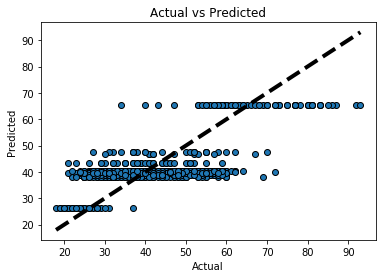

In [34]:
# Running model against the test data

from sklearn.model_selection import cross_val_predict


fig, ax = plt.subplots()

ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Actual vs Predicted")

plt.show()

# from the score it is clear that only profession is not sufficient to predict the age of the user